In [1]:
import numpy as np
#pip install pysindy
import pysindy as psd
from data_loader import data_loader_noH
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train, dx_train, x_val, dx_val = data_loader_noH()

In [3]:
library = psd.PolynomialLibrary(degree=2)
model = psd.SINDy(optimizer=psd.STLSQ(threshold=0.02), feature_library=library)

In [4]:
model.fit(x_train, t = 1, x_dot=dx_train)

SINDy(differentiation_method=FiniteDifference(axis=-2),
      feature_library=PolynomialLibrary(),
      feature_names=['x0', 'x1', 'x2', 'x3', 'x4'],
      optimizer=STLSQ(threshold=0.02))

In [40]:
model.print()

(x0)' = 0.075 x0 + 0.027 x1 + -0.075 x2 + -0.036 x0^2 + 0.224 x0 x1 + -0.051 x0 x2 + -0.112 x0 x3 + -0.374 x1^2 + 0.387 x1 x2 + 0.091 x1 x3 + 0.022 x1 x4 + -0.133 x2^2 + -0.026 x2 x4 + 0.030 x3^2 + -0.063 x3 x4 + 0.034 x4^2
(x1)' = 0.125 x0 + -0.063 x2 + -0.030 x3 + -0.088 x0^2 + 0.257 x0 x1 + -0.122 x0 x3 + -0.310 x1^2 + 0.195 x1 x2 + 0.098 x1 x3 + 0.080 x1 x4 + -0.046 x2^2 + -0.075 x2 x4 + 0.052 x3^2 + -0.092 x3 x4 + 0.046 x4^2
(x2)' = 0.160 x0 + -0.032 x1 + -0.056 x2 + -0.035 x3 + -0.078 x0^2 + 0.172 x0 x1 + 0.044 x0 x2 + -0.216 x0 x3 + 0.098 x0 x4 + -0.216 x1^2 + 0.117 x1 x2 + 0.243 x1 x3 + -0.077 x1 x4 + -0.036 x2^2 + -0.066 x2 x3 + 0.056 x3^2 + -0.091 x3 x4 + 0.042 x4^2
(x3)' = 0.151 x1 + -0.087 x2 + -0.043 x4 + 0.210 x0 x1 + -0.242 x0 x2 + -0.023 x0 x3 + 0.096 x0 x4 + -0.439 x1^2 + 0.639 x1 x2 + -0.058 x1 x3 + -0.194 x2^2 + 0.058 x2 x3 + -0.046 x2 x4
(x4)' = 0.103 x0 + 0.130 x1 + -0.124 x2 + -0.072 x3 + -0.065 x0^2 + 0.260 x0 x1 + -0.169 x0 x2 + -0.058 x0 x3 + 0.077 x0 x4 + -0.3

In [5]:
theta = np.array(library.transform(x_val))

In [6]:
sindy_coeff = np.transpose(model.coefficients())

In [7]:
dx_predict = np.matmul(theta, sindy_coeff)

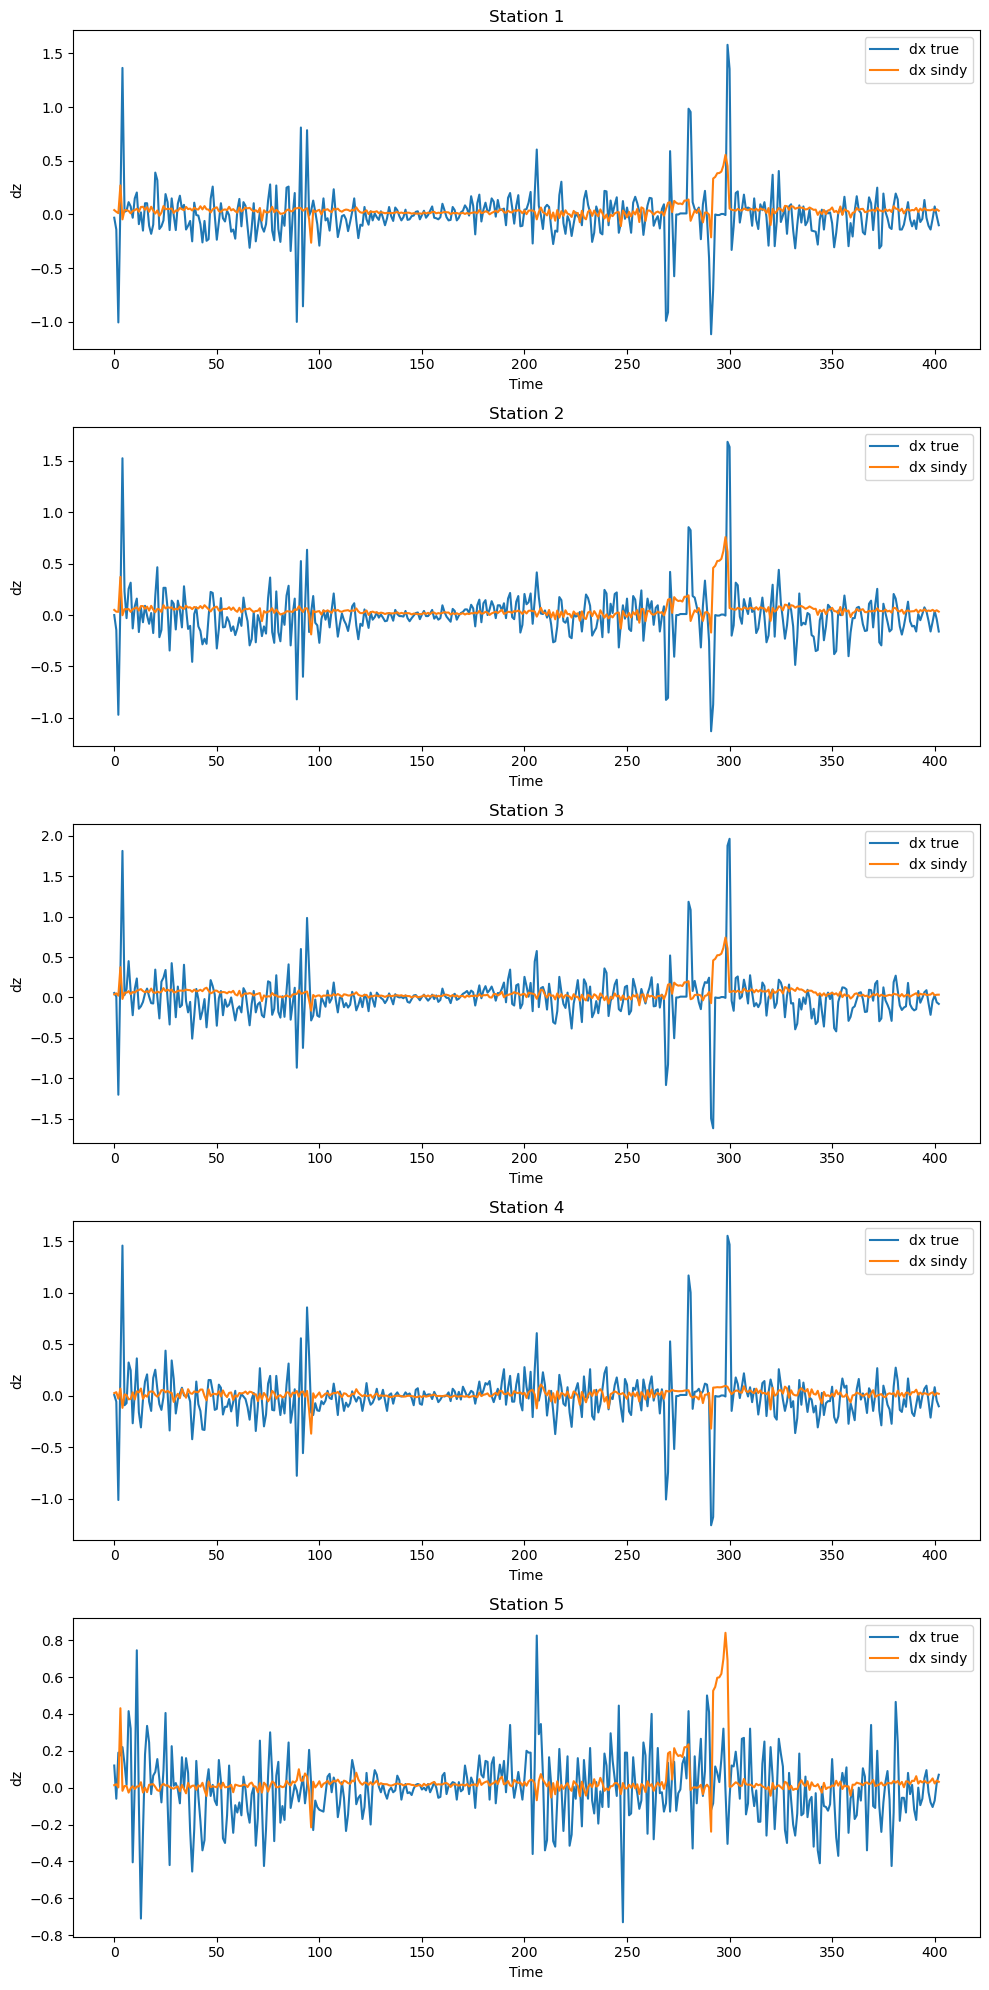

In [41]:
fig, axs = plt.subplots(nrows=dx_val.shape[1], ncols=1, figsize=(10, 20))

# Plot each column in a separate subplot
for i in range(dx_val.shape[1]):
    axs[i].plot(dx_val[:, i], label = 'dx true')
    axs[i].plot(dx_predict[:,i], label = 'dx sindy')
    axs[i].legend()

# Add titles and axis labels to the subplots
for i, ax in enumerate(axs):
    ax.set_title(f'Station {i+1}')
    ax.set_xlabel('Time')
    ax.set_ylabel('dz')

# Show the figure
plt.tight_layout()
plt.show()

In [32]:
#Simulate data with discovered governing equations
total_sim_timestep = 400
total_pred_step = 4
s = (total_sim_timestep, 5)
sim_result = np.zeros(s)

In [33]:
for t in range(0,total_sim_timestep,total_pred_step):
    x_init = x_val[t,:].reshape(1,-1)
    for s in range(total_pred_step):
        Theta_curr = np.array(library.transform(x_init))
        dx_curr = np.matmul(Theta_curr, sindy_coeff)
        x_new = x_init + dx_curr
        sim_result[t+s,:] = x_init
        x_init = np.array(x_new)

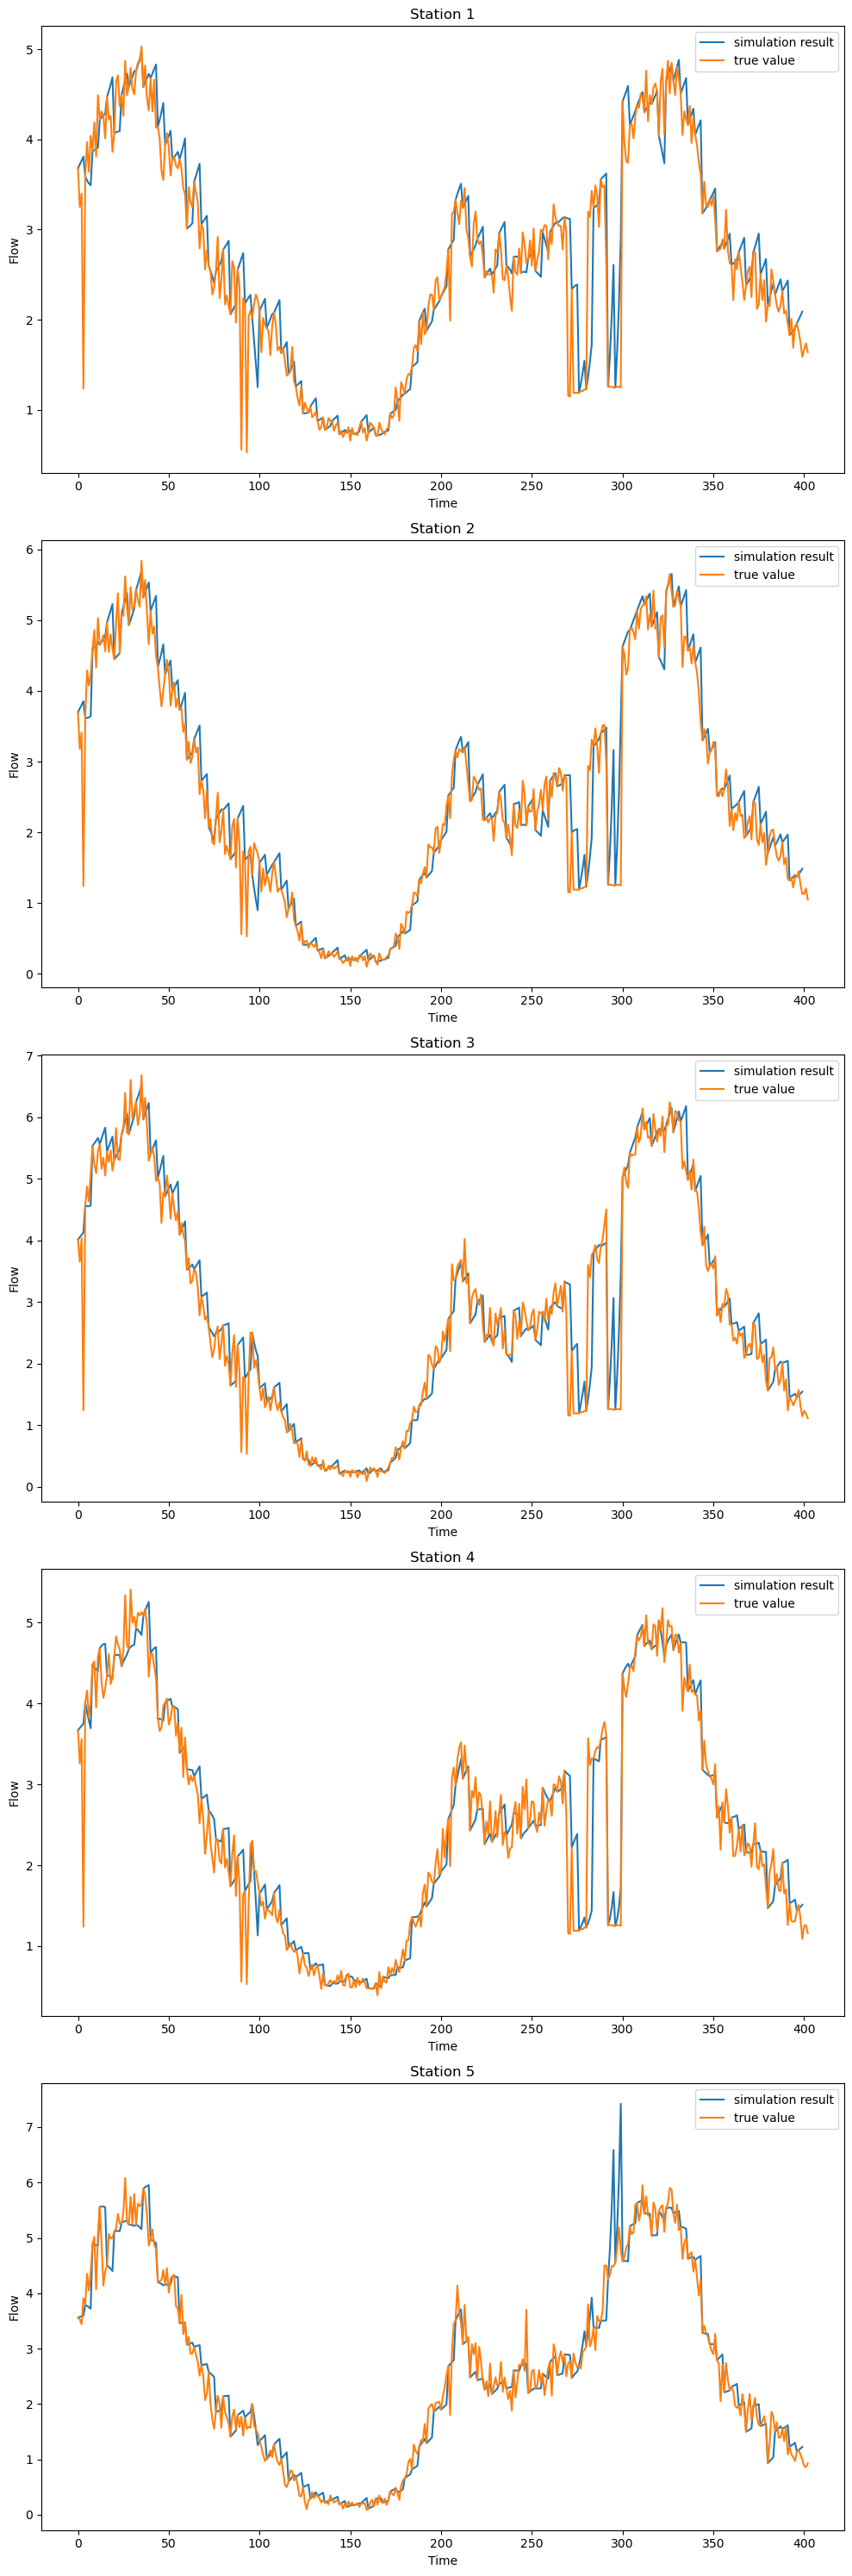

In [34]:
fig, axs = plt.subplots(nrows=x_val.shape[1], ncols=1, figsize=(10, 20))

# Plot each column in a separate subplot
for i in range(x_val.shape[1]):
    axs[i].plot(sim_result[:, i], label = "simulation result")
    axs[i].plot(x_val[:,i], label = "true value")
    axs[i].legend()

# Add titles and axis labels to the subplots
for i, ax in enumerate(axs):
    ax.set_title(f'Station {i+1}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Flow')

# Show the figure
plt.tight_layout()
plt.show()